<a href="https://colab.research.google.com/github/talfr123/Computer_vision_proj1/blob/main/5flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
from imutils import paths

import pickle
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_dir = '/content/drive/MyDrive/my_ml_projects/mini_VGGNet_5flowers/pyimagesearch/datasets/5flowers_train'
valid_dir = '/content/drive/MyDrive/my_ml_projects/mini_VGGNet_5flowers/pyimagesearch/datasets/5flowers_test'

In [ ]:
datagenerator = {
    "train": ImageDataGenerator(horizontal_flip=True, 
                                vertical_flip=True, 
                                rescale=1. / 255, 
                                validation_split=0.1, 
                                shear_range=0.1, 
                                zoom_range=0.1, 
                                width_shift_range=0.1, 
                                height_shift_range=0.1, 
                                rotation_range=50, 
                                ).flow_from_directory(directory=train_dir, 
                                                      target_size=(224, 224), 
                                                      subset='training',
                                                      shuffle=True, 
                                                      seed=42 
                                                      ),
    "valid": ImageDataGenerator(rescale=1. / 255, 
                                validation_split=0.1, 
                                ).flow_from_directory(directory=train_dir, 
                                                      target_size=(224, 224), 
                                                      subset='validation',
                                                      shuffle=True, 
                                                      seed=42 
                                                      ),
}

Found 3139 images belonging to 5 classes.
Found 346 images belonging to 5 classes.


In [ ]:
base_model = InceptionV3(weights=None, include_top=False, input_shape=(224, 224, 3))

base_model.load_weights('/content/drive/MyDrive/my_ml_projects/mini_VGGNet_5flowers/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

base_model.trainable = False

In [ ]:
model = Sequential([
    base_model, 
    GlobalAveragePooling2D(), 
    Dropout(0.15), 
    Dense(1024, activation='relu'), 
    Dense(5, activation='softmax') 
])

In [ ]:
opt = optimizers.Adam(learning_rate=0.0002)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 23,906,085
Trainable params: 2,103,301
Non-trainable params: 21,802,784
____________________________________

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
batch_size = 32
epochs = 10

train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]

In [ ]:
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 98
validation_steps : 10


In [ ]:
filepath = "/content/drive/MyDrive/my_ml_projects/mini_VGGNet_5flowers/my_2model.h5"

checckpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                               save_best_only=True, 
                               mode='max')

callbacks_list = [checckpoint1]

H = model.fit_generator(generator=train_generator, epochs=epochs, 
                        steps_per_epoch=steps_per_epoch, 
                        validation_data=valid_generator, 
                        validation_steps=validation_steps, 
                        callbacks=callbacks_list)

Epoch 1/10
98/98 [==============================] - ETA: 0s - loss: 0.7991 - accuracy: 0.6981
Epoch 1: val_accuracy improved from -inf to 0.79688, saving model to /content/drive/MyDrive/my_ml_projects/mini_VGGNet_5flowers/my_2model.h5
98/98 [==============================] - 687s 7s/step - loss: 0.7991 - accuracy: 0.6981 - val_loss: 0.5399 - val_accuracy: 0.7969
Epoch 2/10
98/98 [==============================] - ETA: 0s - loss: 0.5151 - accuracy: 0.8156
Epoch 2: val_accuracy improved from 0.79688 to 0.81563, saving model to /content/drive/MyDrive/my_ml_projects/mini_VGGNet_5flowers/my_2model.h5
98/98 [==============================] - 429s 4s/step - loss: 0.5151 - accuracy: 0.8156 - val_loss: 0.5406 - val_accuracy: 0.8156
Epoch 3/10
98/98 [==============================] - ETA: 0s - loss: 0.4596 - accuracy: 0.8326
Epoch 3: val_accuracy did not improve from 0.81563
98/98 [==============================] - 410s 4s/step - loss: 0.4596 - accuracy: 0.8326 - val_loss: 0.5156 - val_accuracy:

In [11]:
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

loss = H.history['loss']
val_loss = H.history['val_loss']

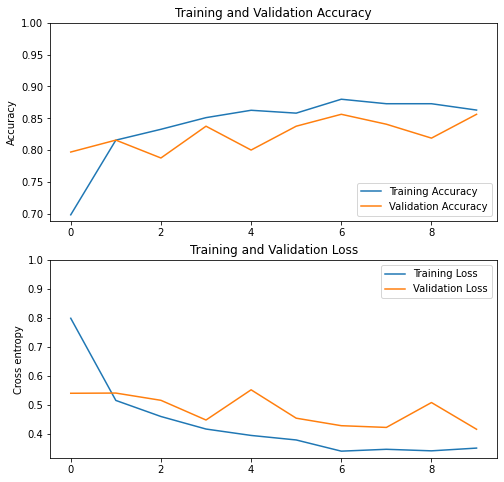

In [12]:
# Graph 1
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# Graph 2
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross entropy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Loss')
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(valid_generator)
print('test accuracy :', test_acc)

11/11 [==============================] - 38s 3s/step - loss: 0.3927 - accuracy: 0.8642
test accuracy : 0.8641618490219116


In [14]:
from IPython.utils.tempdir import TemporaryWorkingDirectory
loaded_best_model = keras.models.load_model('/content/drive/MyDrive/my_ml_projects/mini_VGGNet_5flowers/my_2model.h5')

def predict(img_rel_path):

  img = image.load_img(img_rel_path, target_size=(224, 224))

  img = image.img_to_array(img, dtype=np.uint8)

  img = np.array(img)/255.0

  plt.title("Loaded Image")
  plt.axis('off')
  plt.imshow(img.squeeze())
  plt.show()

  p = loaded_best_model.predict(img[np.newaxis, ...])

  labels = {0: 'daisy', 1: 'dandelion', 2: 'rose', 3: 'sunflower', 4: 'tulip'}

  predicted_class= labels[np.argmax(p[0], axis=-1)]
  print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
  print("Classified:", predicted_class, "\n\n")

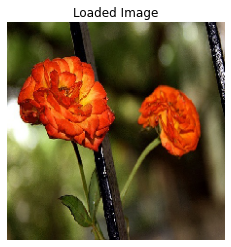

1/1 [==============================] - 3s 3s/step


Maximum Probability:  0.8418681
Classified: rose 




In [15]:
predict('/content/drive/MyDrive/my_ml_projects/mini_VGGNet_5flowers/pyimagesearch/datasets/5flowers_valid/flw1/Image_118.jpg')

In [ ]:
from IPython.utils.tempdir import TemporaryWorkingDirectory
loaded_best_model = keras.models.load_model('/content/drive/MyDrive/my_ml_projects/mini_VGGNet_5flowers/my_2model.h5')

In [16]:
def predict_table(img_rel_path):

	labels = {0: 'daisy', 1: 'dandelion', 2: 'rose', 3: 'sunflower', 4: 'tulip'}

	plt.figure(figsize=(20, 10))

	imagePaths = np.array(list(paths.list_images(img_rel_path)))
	idx = np.random.randint(0, len(imagePaths), size=(15,))
	imagePaths = imagePaths[idx]

	for (i, path) in enumerate(imagePaths):
            ax = plt.subplot(3, 5, i+1)
            img = image.load_img(path, target_size=(224,224))
            img = image.img_to_array(img, dtype=np.uint8)
            img = np.array(img)/255.0
            p = loaded_best_model.predict(img[np.newaxis, ...])
            predicted_class = labels[np.argmax(p[0], axis=-1)]
            plt.title("Classified:" + predicted_class)
            plt.xlabel("Maximum Propability:" + str(np.max(p[0], axis=-1)))
            plt.axis('off')
            plt.imshow(img.squeeze())

1/1 [==============================] - 0s 170ms/step


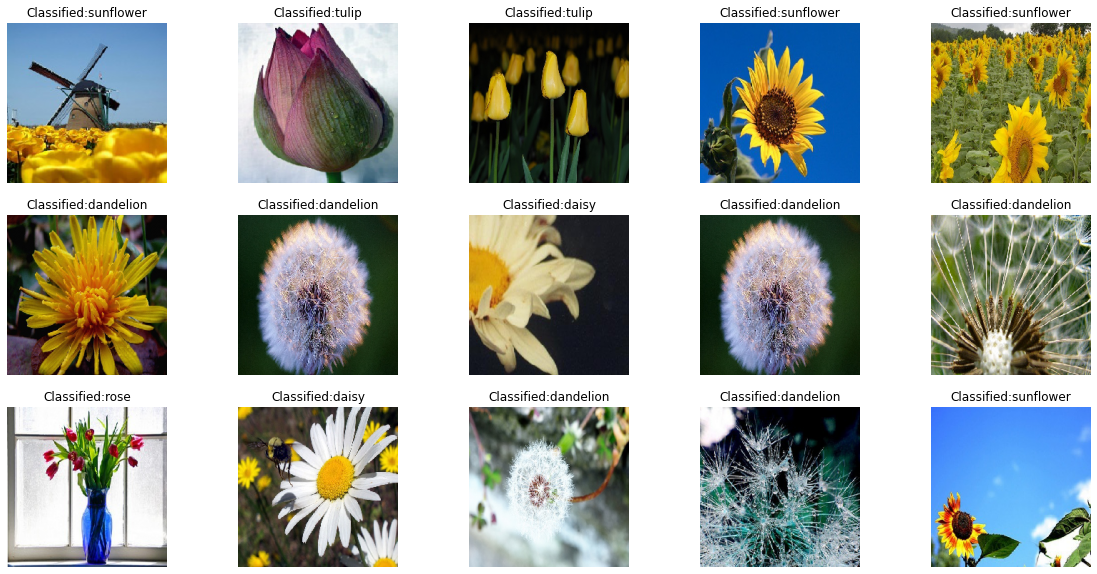

In [18]:
predict_table('/content/drive/MyDrive/my_ml_projects/mini_VGGNet_5flowers/pyimagesearch/datasets/5flowers_valid/flw2')